# Extreme Gradient Boosting (XGBoost)

It is referred to as extreme gradient boosting, because there is a learning rate parameter that incorporates this algorithm. 

This notebook aim to build classification model in R with help of XGBoost algorithm

In [2]:
if(!require(xgboost)) install.packages('xgboost')

Loading required package: xgboost



In [3]:
# Importing the datasets for train, test and out-of-sample
train_RE = read.csv('train_remove_outlier.csv')
test_RE = read.csv('test_remove_outlier.csv')
OOS_RE = read.csv('oos_remove_outlier.csv')
# Fitting XGBoost model to the Train set for model training process

In [4]:
# Code for Model 1:Vanilla xgboost with No of Trees = 100

classifier = xgboost(data = as.matrix(train_RE[-1]), label = train_RE$df.output, nrounds = 100)
# Predicting the Test set results
y_pred = predict(classifier, newdata = as.matrix(test_RE[-1]))
y_pred = (y_pred >= 0.5)
# Making the Confusion Matrix
cm = table(test_RE[, 1], y_pred)
cm
# Classification Rate
#1) Accuracy:
accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
accuracy  


[1]	train-rmse:0.350061 
[2]	train-rmse:0.245034 
[3]	train-rmse:0.171517 
[4]	train-rmse:0.120045 
[5]	train-rmse:0.084048 
[6]	train-rmse:0.058837 
[7]	train-rmse:0.041188 
[8]	train-rmse:0.028830 
[9]	train-rmse:0.020180 
[10]	train-rmse:0.014123 
[11]	train-rmse:0.009887 
[12]	train-rmse:0.006922 
[13]	train-rmse:0.004846 
[14]	train-rmse:0.003392 
[15]	train-rmse:0.002374 
[16]	train-rmse:0.001662 
[17]	train-rmse:0.001163 
[18]	train-rmse:0.000814 
[19]	train-rmse:0.000570 
[20]	train-rmse:0.000399 
[21]	train-rmse:0.000279 
[22]	train-rmse:0.000196 
[23]	train-rmse:0.000137 
[24]	train-rmse:0.000096 
[25]	train-rmse:0.000067 
[26]	train-rmse:0.000047 
[27]	train-rmse:0.000033 
[28]	train-rmse:0.000023 
[29]	train-rmse:0.000016 
[30]	train-rmse:0.000011 
[31]	train-rmse:0.000008 
[32]	train-rmse:0.000006 
[33]	train-rmse:0.000004 
[34]	train-rmse:0.000004 
[35]	train-rmse:0.000004 
[36]	train-rmse:0.000004 
[37]	train-rmse:0.000004 
[38]	train-rmse:0.000004 
[39]	train-rmse:0.000

                      y_pred
                       FALSE TRUE
  0.000107288757835133     1    3
  0.000218427533872209     2    4
  0.000433111146053048     2    1
  0.000544249922090125     0    1
  0.000758827437760391     0    1
  0.000869966213795689     0    1
  0.00108454372946595      1    1
  0.00152150489372095      1    0
  0.00206190479760913      2    0
  0.0021730435736462       1    1
  0.00249875986535177      1    3
  0.00271344347753439      0    3
  0.00282458225356968      1    1
  0.0030390536727276       0    1
  0.00336487606094551      0    2
  0.00347601483698259      1    2
  0.00369059235265286      0    3
  0.00380173112868993      0    1
  0.00401630864435842      0    2
  0.00412755351690785      0    1
  0.00434213103257811      0    1
  0.00445326980861341      0    1
  0.00466784732428348      1    2
  0.00477898610032056      1    2
  0.00499366971250139      3    3
  0.00510480848853847      0    1
  0.00531938600420874      2    1
  0.005430524780244

[1] 0.5

In [5]:
# Code for Xgboost parameters:  parameter tuning learning rate=0.001

xgb_params <- list(colsample_bytree = 0.7, #how many variables to consider for each tree
subsample = 0.75, #how much of the data to use for each tree
booster = "gbtree",
max_depth = 5, #how many levels in the tree
eta = 0.001, #shrinkage rate to control overfitting through conservative approach
eval_metric = "Accuracy", 
objective = "binary:logistic",
gamma = 3)


In [6]:
# Training the model

gb_dt = xgboost(xgb_params,data = as.matrix(train_RE[-1]), label = train_RE$df.output,nrounds = 100)
gb_dt$params
#Predict using test set
y_pred1 = predict(gb_dt, newdata = as.matrix(test_RE[-1]))
y_pred1 = (y_pred1 >= 0.5)
cm = table(test_RE[, 1], y_pred1)
cm
#Classification Rate
#1) Accuracy:
accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
accuracy  


[1]	train-rmse:0.350061 
[2]	train-rmse:0.245034 
[3]	train-rmse:0.171517 
[4]	train-rmse:0.120045 
[5]	train-rmse:0.084048 
[6]	train-rmse:0.058837 
[7]	train-rmse:0.041188 
[8]	train-rmse:0.028830 
[9]	train-rmse:0.020180 
[10]	train-rmse:0.014123 
[11]	train-rmse:0.009887 
[12]	train-rmse:0.006922 
[13]	train-rmse:0.004846 
[14]	train-rmse:0.003392 
[15]	train-rmse:0.002374 
[16]	train-rmse:0.001662 
[17]	train-rmse:0.001163 
[18]	train-rmse:0.000814 
[19]	train-rmse:0.000570 
[20]	train-rmse:0.000399 
[21]	train-rmse:0.000279 
[22]	train-rmse:0.000196 
[23]	train-rmse:0.000137 
[24]	train-rmse:0.000096 
[25]	train-rmse:0.000067 
[26]	train-rmse:0.000047 
[27]	train-rmse:0.000033 
[28]	train-rmse:0.000023 
[29]	train-rmse:0.000016 
[30]	train-rmse:0.000011 
[31]	train-rmse:0.000008 
[32]	train-rmse:0.000006 
[33]	train-rmse:0.000004 
[34]	train-rmse:0.000004 
[35]	train-rmse:0.000004 
[36]	train-rmse:0.000004 
[37]	train-rmse:0.000004 
[38]	train-rmse:0.000004 
[39]	train-rmse:0.000

$validate_parameters
[1] TRUE

                      y_pred1
                       FALSE TRUE
  0.000107288757835133     1    3
  0.000218427533872209     2    4
  0.000433111146053048     2    1
  0.000544249922090125     0    1
  0.000758827437760391     0    1
  0.000869966213795689     0    1
  0.00108454372946595      1    1
  0.00152150489372095      1    0
  0.00206190479760913      2    0
  0.0021730435736462       1    1
  0.00249875986535177      1    3
  0.00271344347753439      0    3
  0.00282458225356968      1    1
  0.0030390536727276       0    1
  0.00336487606094551      0    2
  0.00347601483698259      1    2
  0.00369059235265286      0    3
  0.00380173112868993      0    1
  0.00401630864435842      0    2
  0.00412755351690785      0    1
  0.00434213103257811      0    1
  0.00445326980861341      0    1
  0.00466784732428348      1    2
  0.00477898610032056      1    2
  0.00499366971250139      3    3
  0.00510480848853847      0    1
  0.00531938600420874      2    1
  0.00543052478024

[1] 0.5

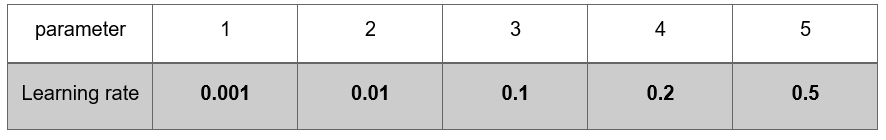

Findings:

1)	Dataset with outlier: The result generated from data with an outlier for the OOS dataset is at 0.719% is about 0.6% more than the result generated by Test set.

2)	Dataset without outlier: The result generated from data with an outlier for the OOS dataset is at 0.712% is about 0.5% less than the result generated by Test set.

3)	The overall conclusion for Xgboost is that the accuracy result seems to perform better for a dataset with outlier value which is about 0.7%.

4)	Despite increasing the number of trees (nrounds) allocated for the vanilla xgboost (without any parameter tuning), the accuracy result did not contribute to higher accuracy rate, instead it performed reverse outcome where the accuracy rate started to reduce by 0.1%. Therefore, the best accuracy rate that can be achieved is at nrounds = 100 at 71.2% for RE_OOS dataset (without outlier) and 71.9% for dataset that contains outliers.

5)	From the overall parameter tuning for both datasets with and without outliers, the highest accuracy rate achieved are at 71.2% and 71.9% closed to 72%


The model was done for all alternatives cases and result can be seen in the table

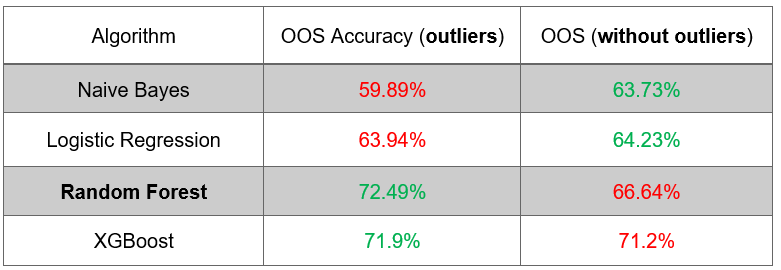